# Objective:- predicting how does HR Analytics help in analyzing attrition and will try to understand the process step by step.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
hr_df=pd.read_csv('HR_ANALYTICS.csv')

# Finding insights of the data and what it consist of

In [3]:
hr_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
hr_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
hr_df.shape #finding the number of rows and columns present in the dataset

(1470, 35)

In [6]:
hr_df.info() #finding the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#finding the different values in attrrrion column
print(hr_df['Attrition'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['Attrition'].value_counts())

['Yes' 'No']

 

No     1233
Yes     237
Name: Attrition, dtype: int64


In [8]:
#finding the different values in BusinessTravel column
print(hr_df['BusinessTravel'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['BusinessTravel'].value_counts())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [9]:
#finding the different values in  Department column
print(hr_df['Department'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['Department'].value_counts())

['Sales' 'Research & Development' 'Human Resources']

 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [10]:
#finding the different values in  Education_Field column
print(hr_df['EducationField'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['EducationField'].value_counts())

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [11]:
#finding the different values in Gender column
print(hr_df['Gender'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['Gender'].value_counts())

['Female' 'Male']

 

Male      882
Female    588
Name: Gender, dtype: int64


In [12]:
#finding the different values in JobRole 
print(hr_df['JobRole'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['JobRole'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [13]:
#finding the different values in MaritalStatus
print(hr_df['MaritalStatus'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']

 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [14]:
#finding the different values in  Over18 
print(hr_df['Over18'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['Over18'].value_counts())

['Y']

 

Y    1470
Name: Over18, dtype: int64


In [15]:
#finding the different values in  OverTime 
print(hr_df['OverTime'].unique())
print("\n \n")
#finding thee count of different values
print(hr_df['OverTime'].value_counts())

['Yes' 'No']

 

No     1054
Yes     416
Name: OverTime, dtype: int64


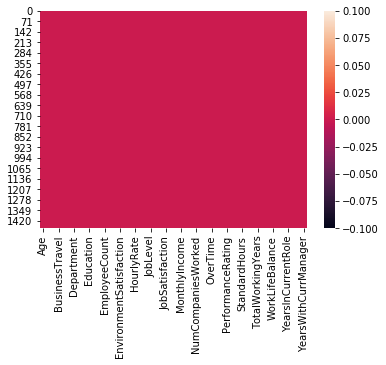

In [16]:
#checking for null values in the dataset
sns.heatmap(hr_df.isnull())

In [17]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
#the dataset donot cooonist of null values

# Bivariate Analysis

Text(0.5, 1.0, 'Attrition Count')

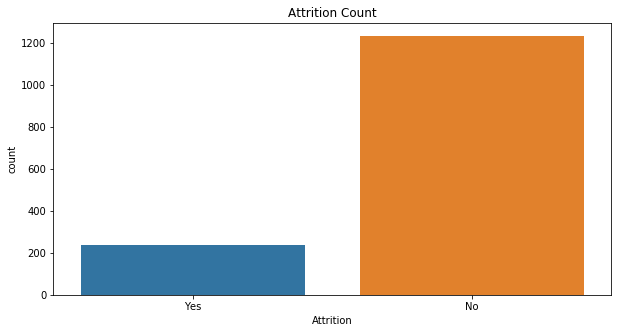

In [19]:
#finding the distribution of yes and No in attrition column
plt.figure(figsize=(10,5))
sns.countplot(hr_df['Attrition'])
plt.title('Attrition Count')

In [20]:
#here we found that the yes attrition is very low as compared to No attrition

Text(0.5, 1.0, 'Attrition_Count W.R.T Travel Preference')

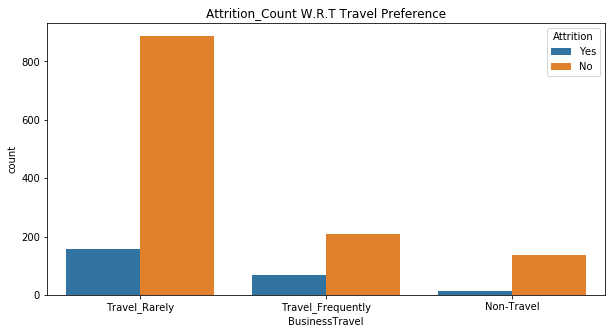

In [21]:
#finding how bussiness travel is affecting attrition
plt.figure(figsize=(10,5))
sns.countplot(hr_df['BusinessTravel'],hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T Travel Preference')

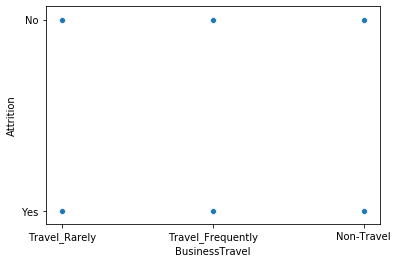

In [22]:
sns.scatterplot(hr_df['BusinessTravel'],hr_df['Attrition'])

Text(0.5, 1.0, 'Attrition_Count W.R.T Age')

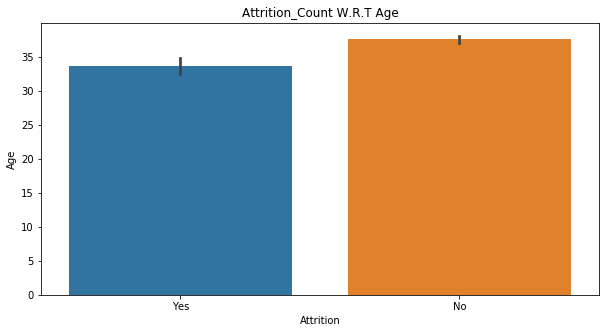

In [23]:
#finding how Age is affecting attrition
plt.figure(figsize=(10,5))
sns.barplot(hr_df['Attrition'],hr_df['Age'])
plt.title('Attrition_Count W.R.T Age')

In [24]:
#the barplot predicts that the employee having age above 35 are in No attrition zone

Text(0.5, 1.0, 'Attrition_Count W.R.T Education_Qualification')

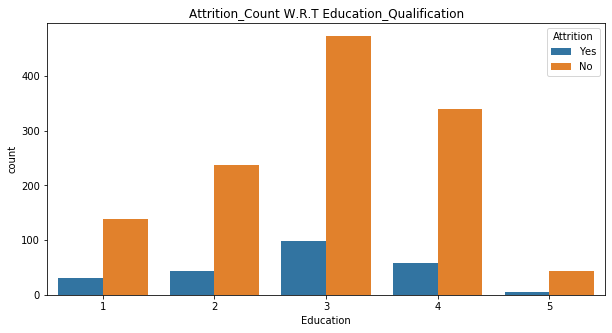

In [25]:
#finding how different education qualification is affecting attrition
plt.figure(figsize=(10,5))
sns.countplot(hr_df['Education'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T Education_Qualification')

Text(0.5, 1.0, 'Attrition_Count W.R.T Education_Field')

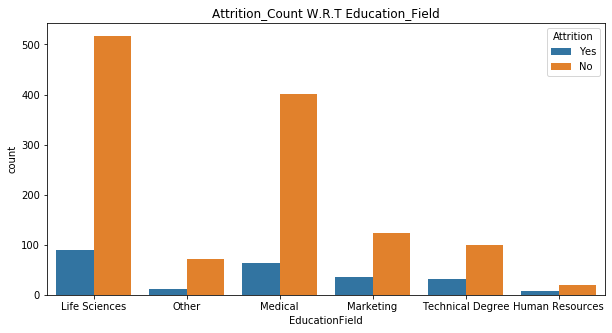

In [26]:
#finding how different education_field qualification is affecting attrition
plt.figure(figsize=(10,5))
sns.countplot(hr_df['EducationField'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T Education_Field')

Text(0.5, 1.0, 'Employee_Number_vs Employee_Count')

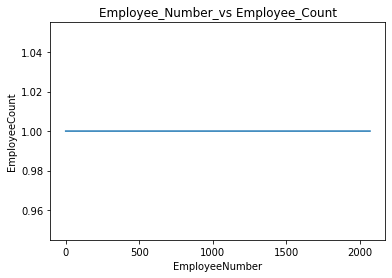

In [27]:
#seeing how employee count and employee number is related
sns.lineplot(hr_df['EmployeeNumber'],hr_df['EmployeeCount'])
plt.title('Employee_Number_vs Employee_Count')

Text(0.5, 1.0, 'Attrition_Count W.R.T EnvironmentSatisfaction')

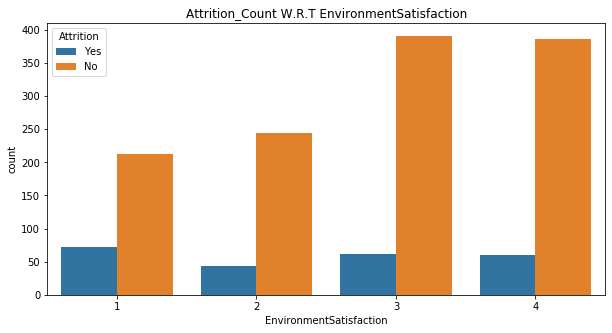

In [28]:
#finding how different enviroment satisfaction is affecting attrition
plt.figure(figsize=(10,5))
sns.countplot(hr_df['EnvironmentSatisfaction'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T EnvironmentSatisfaction')

Text(0.5, 1.0, 'Attrition_Count W.R.T Gender')

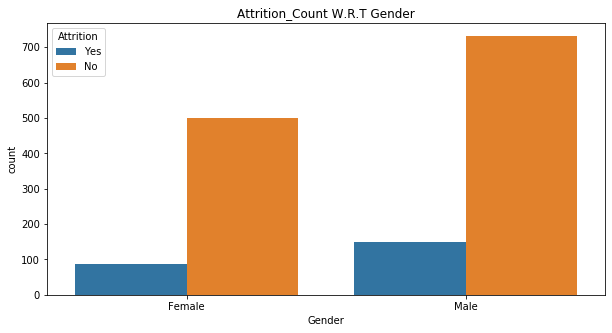

In [29]:
#finding how different Gender is affecting attrition
plt.figure(figsize=(10,5))
sns.countplot(hr_df['Gender'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T Gender')

Text(0.5, 1.0, 'JobRole W.R.T Age')

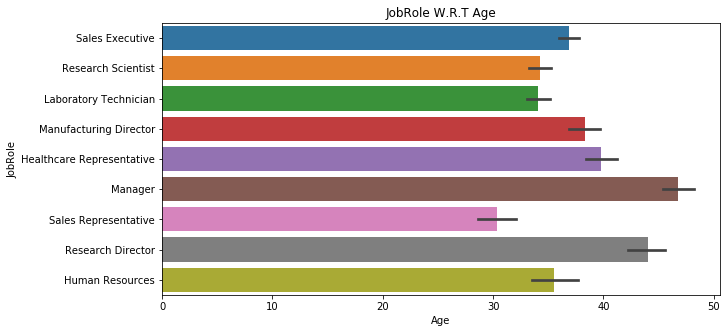

In [30]:
#finding which age people is compatible with different jobrole
plt.figure(figsize=(10,5))
sns.barplot(hr_df['Age'],hr_df['JobRole'])
plt.title('JobRole W.R.T Age')


Text(0.5, 1.0, 'Attrition_Count W.R.T JobRole')

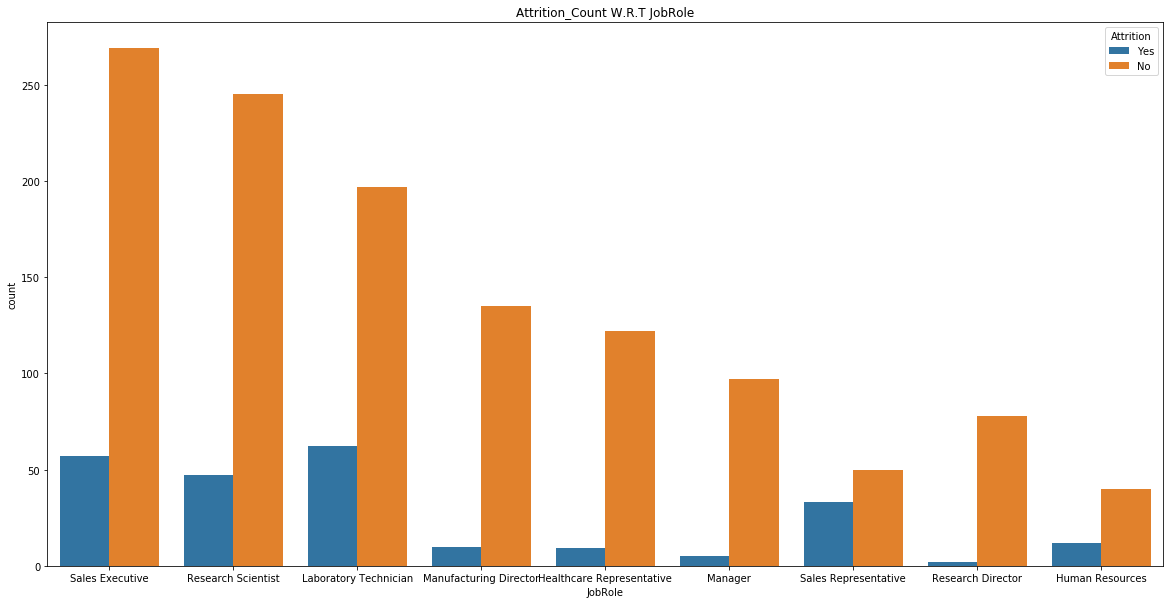

In [31]:
#finding how different Gender is affecting attrition
plt.figure(figsize=(20,10))
sns.countplot(hr_df['JobRole'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T JobRole')

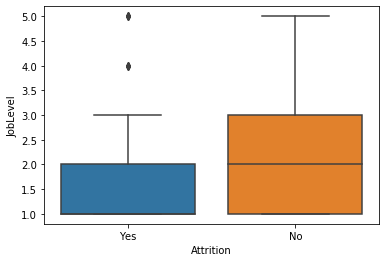

In [32]:
sns.boxplot(hr_df['Attrition'],hr_df['JobLevel'])

In [33]:
#the IQR range of No Attribution higher than that of Yes attribution

Text(0.5, 1.0, 'Attrition_Count W.R.T MaritalStatus')

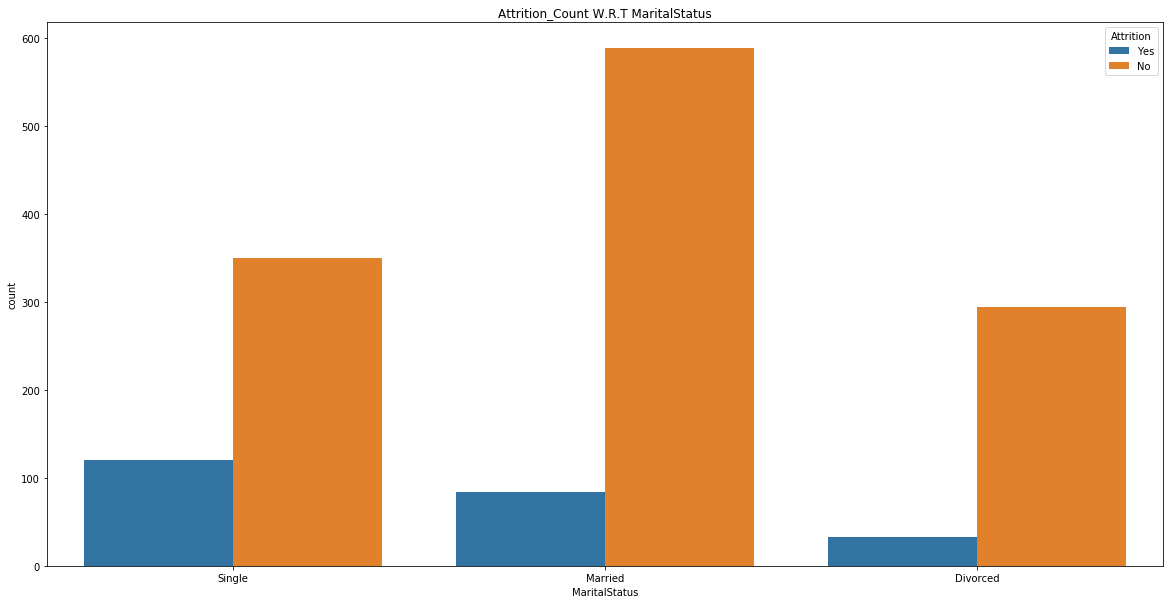

In [34]:
#finding how different marital_status is affecting attrition
plt.figure(figsize=(20,10))
sns.countplot(hr_df['MaritalStatus'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T MaritalStatus')

Text(0.5, 1.0, 'Attrition_Count W.R.T TotalWorkingYears')

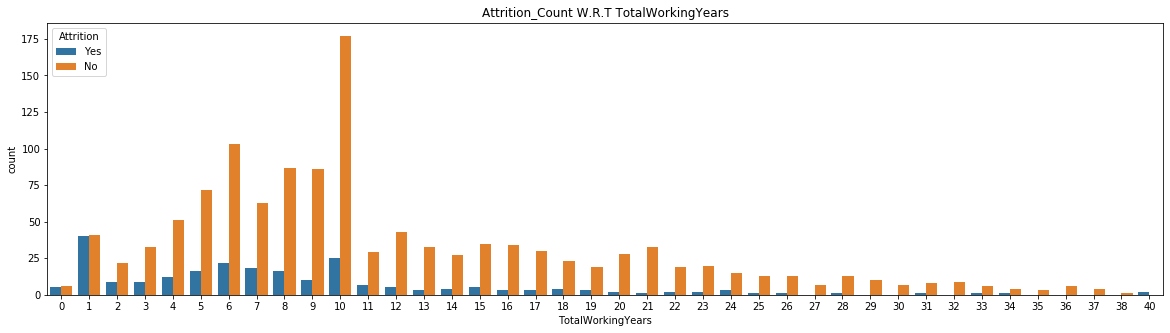

In [35]:
#finding how different Work_Experience_Year is affecting attrition
plt.figure(figsize=(20,5))
sns.countplot(hr_df['TotalWorkingYears'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T TotalWorkingYears')

Text(0.5, 1.0, 'Attrition_Count W.R.T YearsAtCompany')

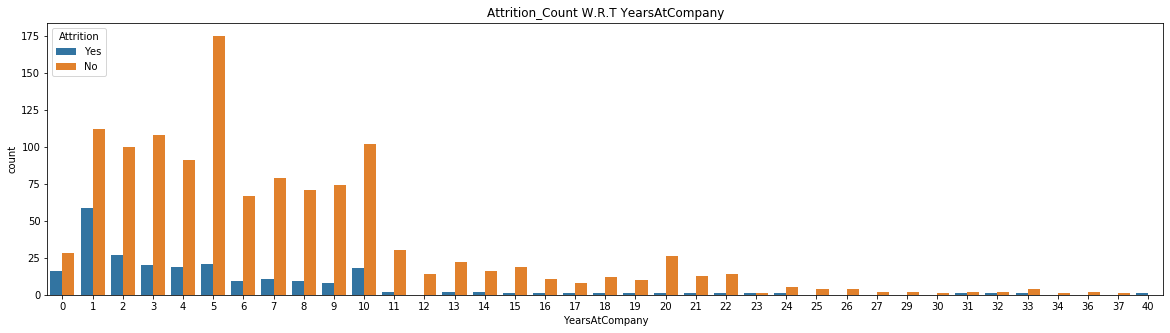

In [36]:
#finding how different Year in curent company is affecting attrition
plt.figure(figsize=(20,5))
sns.countplot(hr_df['YearsAtCompany'], hue=hr_df['Attrition'])
plt.title('Attrition_Count W.R.T YearsAtCompany')

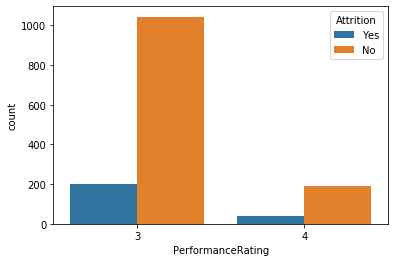

In [37]:
sns.countplot(hr_df['PerformanceRating'],hue=hr_df['Attrition'])

In [38]:
hr_df.drop(['EmployeeCount','EmployeeNumber','MonthlyIncome','Over18','PercentSalaryHike','MonthlyRate','NumCompaniesWorked','StandardHours','StockOptionLevel'],axis=1,inplace=True) 

In [39]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Yes,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,No,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Yes,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Yes,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,No,3,4,6,3,3,2,2,2,2


# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lb=LabelEncoder()

In [42]:
columns=(lb.fit_transform(hr_df['Attrition']),lb.fit_transform(hr_df['BusinessTravel']),lb.fit_transform(hr_df['Department']),lb.fit_transform(hr_df['EducationField']),lb.fit_transform(hr_df['Gender']),lb.fit_transform(hr_df['JobRole']),lb.fit_transform(hr_df['MaritalStatus']),lb.fit_transform(hr_df['OverTime']))

In [43]:
hr_df['Attrition']=columns[0]
hr_df['BusinessTravel']=columns[1]
hr_df['Department']=columns[2]
hr_df['EducationField']=columns[3]
hr_df['Gender']=columns[4]
hr_df['JobRole']=columns[5]
hr_df['MaritalStatus']=columns[6]
hr_df['OverTime']=columns[7]

In [44]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,0,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,1,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,1,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,0,3,4,6,3,3,2,2,2,2


# Univariate Analysis

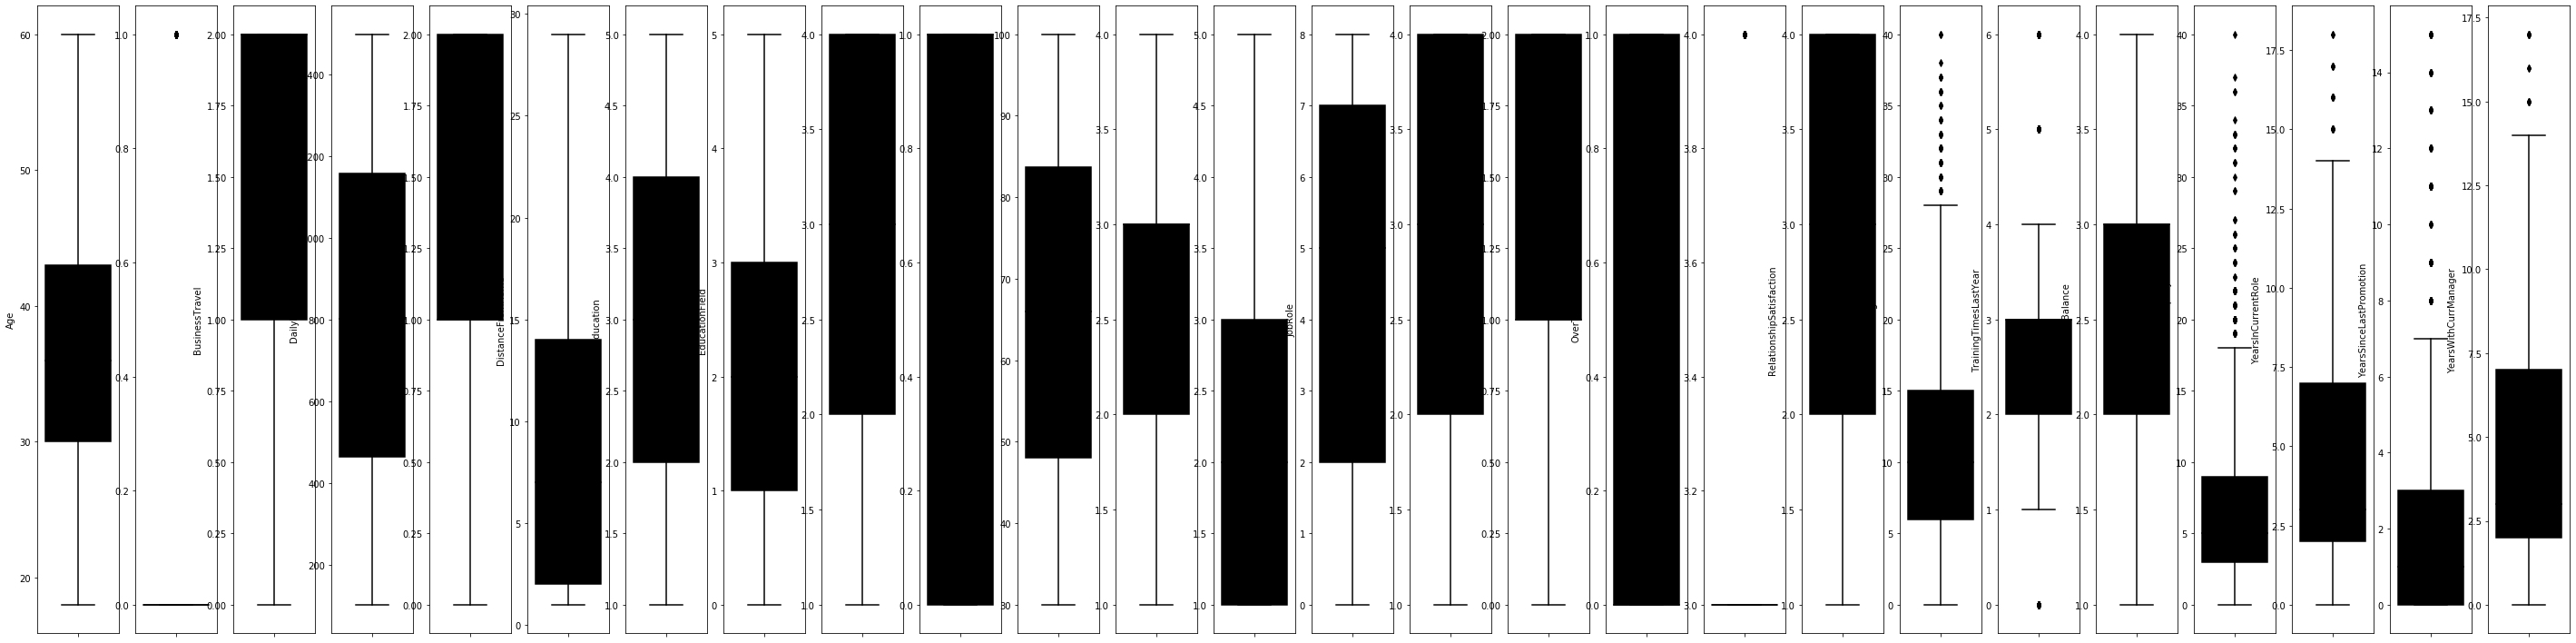

In [45]:
#using boxplot to see outliers and IQR range
collist=hr_df.columns.values
ncol=26
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(hr_df[collist[i]],color='black',orient='v')

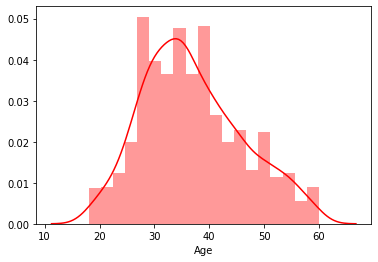

In [46]:
sns.distplot(hr_df['Age'],color='red')

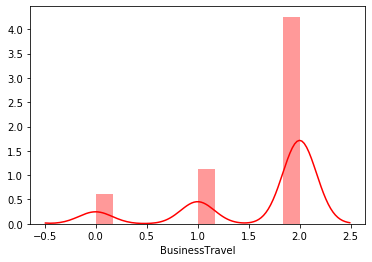

In [47]:
sns.distplot(hr_df['BusinessTravel'],color='red')

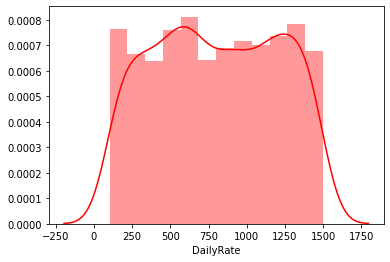

In [48]:
sns.distplot(hr_df['DailyRate'],color='red')

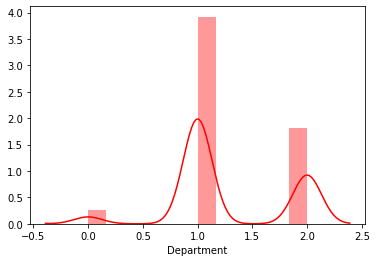

In [49]:
sns.distplot(hr_df['Department'],color='red')

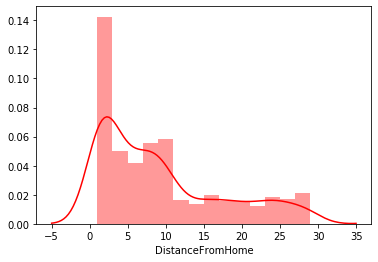

In [50]:
sns.distplot(hr_df['DistanceFromHome'],color='red')

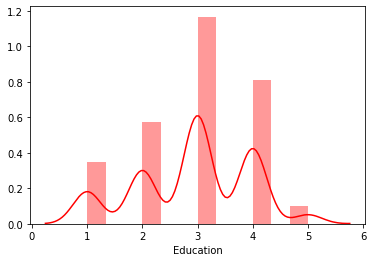

In [51]:
sns.distplot(hr_df['Education'],color='red')

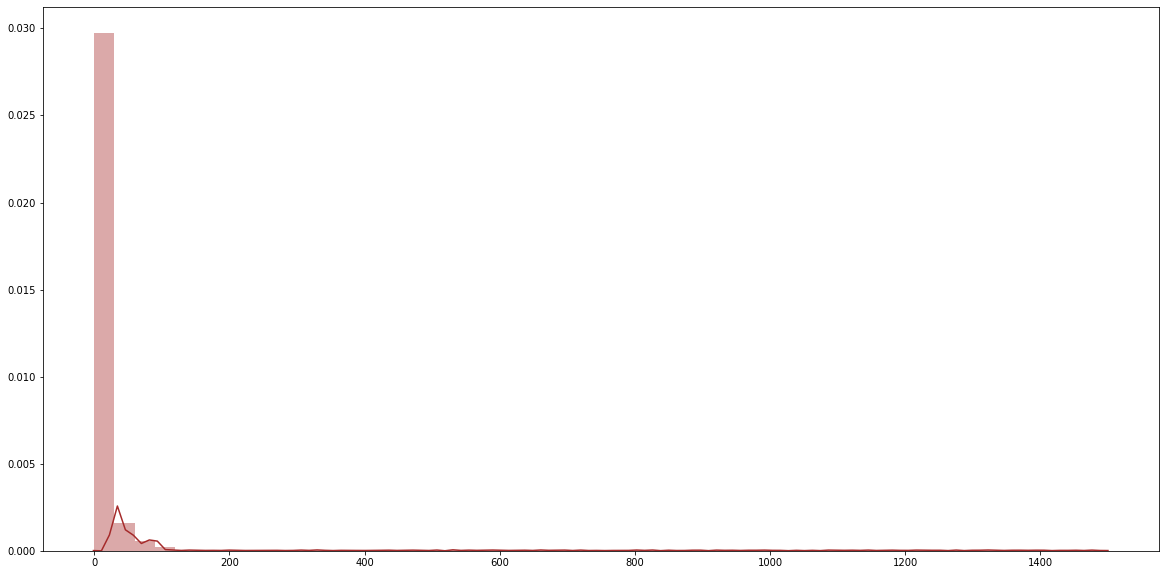

In [52]:
plt.figure(figsize=(20,10))
sns.distplot(hr_df,color='brown')

this shows that dataset is positively skewed

# Statistical Analysis

In [53]:
hr_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,0.282993,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.450606,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,1.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,1.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


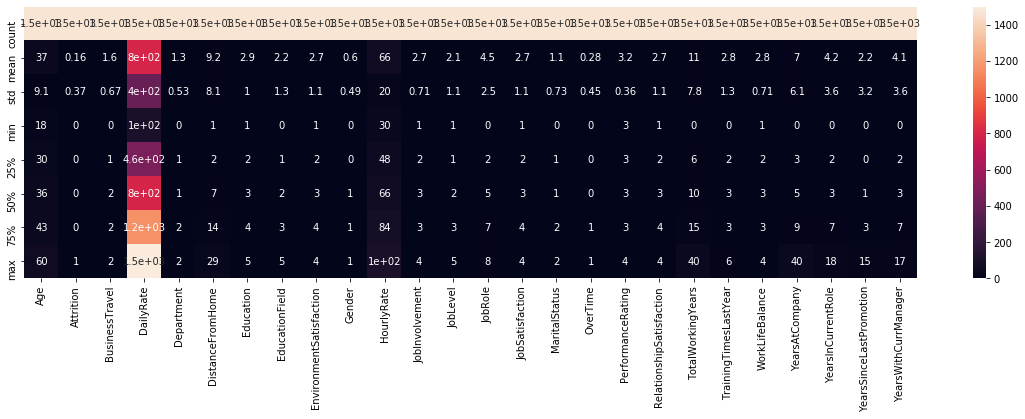

In [54]:
plt.figure(figsize=(20,5))
sns.heatmap(hr_df.describe(),annot=True)

In [55]:
hr_df_cor=hr_df.corr()

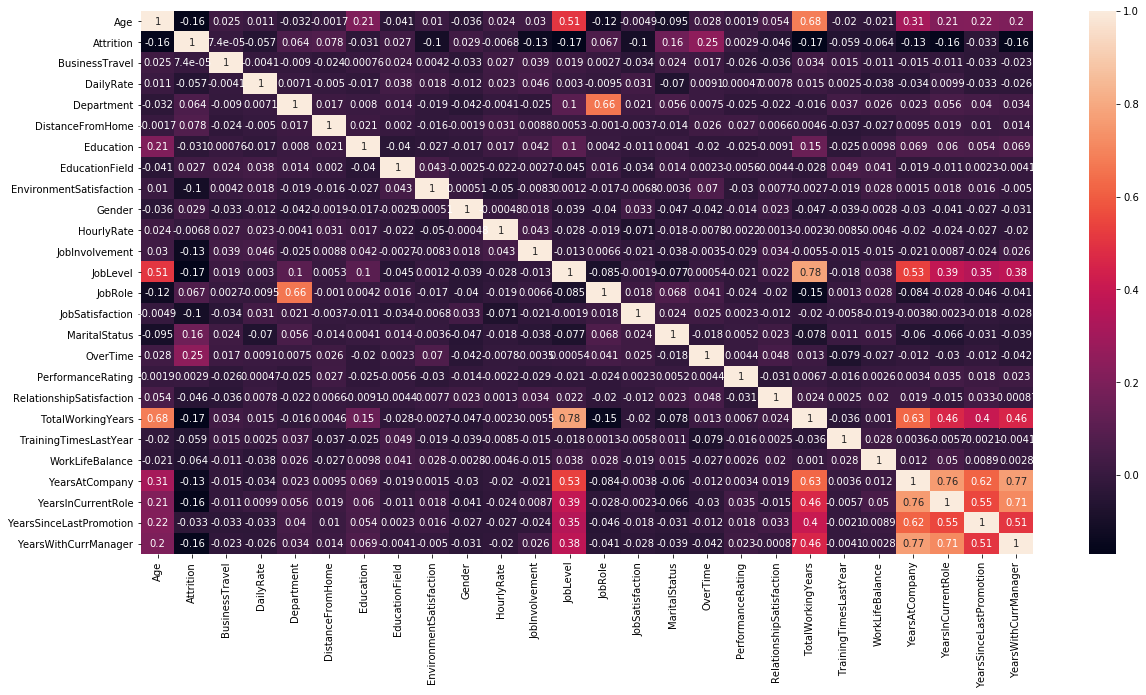

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(hr_df_cor,annot=True)

In [57]:
#checking th skewness of the dataset
hr_df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
OverTime                    0.964489
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [58]:
#the dataset is positively skewed as well as negatively skewed

# Removing outliers and skewness from the dataset

In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(hr_df))
print(z)

[[0.4463504  2.28090588 0.59004834 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 0.4384223  0.91319439 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   2.28090588 0.59004834 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 0.4384223  0.59004834 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.4384223  0.91319439 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.4384223  0.59004834 ... 0.33939374 0.36871529 0.59522723]]


In [61]:
threhold=3

In [62]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([25, 24, 22, 24, 23, 24, 19, 19, 22, 24, 23, 24, 25, 19, 22, 24, 25,
       24, 19, 25, 22, 23, 24, 23, 25, 22, 24, 19, 22, 23, 24, 24, 25, 19,
       22, 22, 24, 24, 19, 23, 22, 22, 24, 22, 25, 24, 22, 19, 22, 24, 25,
       19, 25, 22, 24, 

In [63]:
z[28][25] #checking the above output result 

3.6100788863016295

In [64]:
hr_new=hr_df[(z<3).all(axis=1)]  #removing outliers

In [65]:
print("Shape of the dataset before removing outliers",hr_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",hr_new.shape)

Shape of the dataset before removing outliers (1470, 26)

 

Shape of the dataset after removing the outliers (1387, 26)


In [66]:
#after removing dataset we are left with 1387 rows

In [71]:
#removing the Skewness
colllist=hr_new.columns.values
for i in range(0,len(colllist)):
    if hr_new.skew().loc[colllist[i]]>0.55:
        hr_new[colllist[i]]=np.sqrt(hr_new[colllist[i]])

In [72]:
hr_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.394018
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.442026
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
OverTime                    0.954751
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
TotalWorkingYears           0.042345
TrainingTimesLastYear      -1.181432
WorkLifeBalance            -0.557100
YearsAtCompany              0.075280
YearsInCurrentRole         -0.318539
YearsSinceLastPromotion    -0.051657
YearsWithCurrManager       -0.287532
dtype: float64

# Splitting the data into training and testing sets 

In [77]:
hr_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2,1102,2,1.000000,2,1,2,0,...,1.0,1.316074,1,2.828427,0.000000,1,2.449490,2.000000,0.000000,2.236068
1,49,0.0,1,279,1,2.828427,1,1,3,1,...,0.0,1.414214,4,3.162278,1.732051,3,3.162278,2.645751,1.000000,2.645751
2,37,1.0,2,1373,1,1.414214,2,4,4,1,...,1.0,1.316074,2,2.645751,1.732051,3,0.000000,0.000000,0.000000,0.000000
3,33,0.0,1,1392,1,1.732051,4,1,4,0,...,1.0,1.316074,3,2.828427,1.732051,3,2.828427,2.645751,1.316074,0.000000
4,27,0.0,2,591,1,1.414214,1,3,1,1,...,0.0,1.316074,4,2.449490,1.732051,3,1.414214,1.414214,1.189207,1.414214


In [78]:
y=hr_new['Attrition']

In [80]:
hr_new.drop(['Attrition'],axis=1,inplace=True)

In [84]:
x=hr_new.iloc[:,:]

In [85]:
x.shape

(1387, 25)

In [86]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,2,0,94,...,1.0,1.316074,1,2.828427,0.000000,1,2.449490,2.000000,0.000000,2.236068
1,49,1,279,1,2.828427,1,1,3,1,61,...,0.0,1.414214,4,3.162278,1.732051,3,3.162278,2.645751,1.000000,2.645751
2,37,2,1373,1,1.414214,2,4,4,1,92,...,1.0,1.316074,2,2.645751,1.732051,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.732051,4,1,4,0,56,...,1.0,1.316074,3,2.828427,1.732051,3,2.828427,2.645751,1.316074,0.000000
4,27,2,591,1,1.414214,1,3,1,1,40,...,0.0,1.316074,4,2.449490,1.732051,3,1.414214,1.414214,1.189207,1.414214


In [87]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


In [88]:
x=df_x
print(x)

[[ 0.5366811   0.59312579  0.73432467 ...  0.30547714 -1.13400412
   0.56320375]
 [ 1.44211114 -0.90535412 -1.30776866 ...  0.9539763   0.42655622
   0.96739837]
 [ 0.08396607  0.59312579  1.40675151 ... -1.70303339 -1.13400412
  -1.64290663]
 ...
 [-1.04782149  0.59312579 -1.61544736 ... -0.28280197 -1.13400412
   0.06593912]
 [ 1.44211114 -0.90535412  0.53830356 ...  0.75687958 -1.13400412
   1.14762679]
 [-0.2555702   0.59312579 -0.44180199 ...  0.03638776  0.42655622
  -0.24763992]]


In [89]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [91]:
#finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)



Accuracy SCORE is equal to : 0.8559077809798271 at random state 42
Accuracy SCORE is equal to : 0.8587896253602305 at random state 43
Accuracy SCORE is equal to : 0.8501440922190202 at random state 44
Accuracy SCORE is equal to : 0.8904899135446686 at random state 45
Accuracy SCORE is equal to : 0.8530259365994236 at random state 46
Accuracy SCORE is equal to : 0.8703170028818443 at random state 47
Accuracy SCORE is equal to : 0.8818443804034583 at random state 48
Accuracy SCORE is equal to : 0.8645533141210374 at random state 49
Accuracy SCORE is equal to : 0.8443804034582133 at random state 50
Accuracy SCORE is equal to : 0.8731988472622478 at random state 51
Accuracy SCORE is equal to : 0.8731988472622478 at random state 52
Accuracy SCORE is equal to : 0.8645533141210374 at random state 53
Accuracy SCORE is equal to : 0.8703170028818443 at random state 54
Accuracy SCORE is equal to : 0.8559077809798271 at random state 55
Accuracy SCORE is equal to : 0.8760806916426513 at random stat

In [92]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=73)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1040, 25) (347, 25) (1040,) (347,)


Testing the Algorithms and finding the the best parameters using Grid Search cv

In [93]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'penalty': 'l2'}

In [94]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'C': 1, 'kernel': 'rbf'}

In [95]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 10}

In [96]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.9020172910662824


CROSS_VAL_SCORE = 0.8680950891460745


ROC_AUC_SCORE = 0.7348484848484849


 
 Classification Report 
                precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       297
         1.0       0.74      0.50      0.60        50

    accuracy                           0.90       347
   macro avg       0.83      0.73      0.77       347
weighted avg       0.89      0.90      0.89       347



[[288   9]
 [ 25  25]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_fe

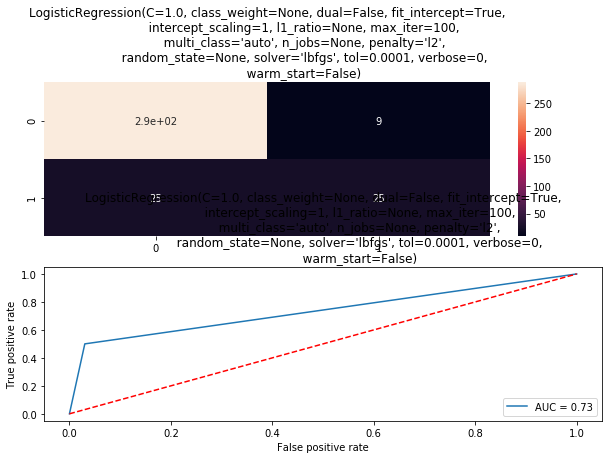

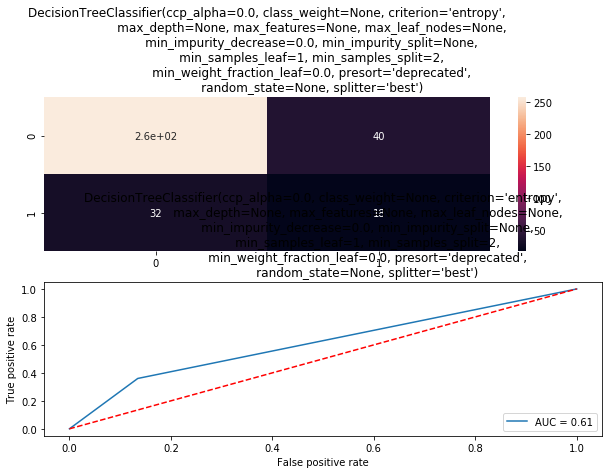

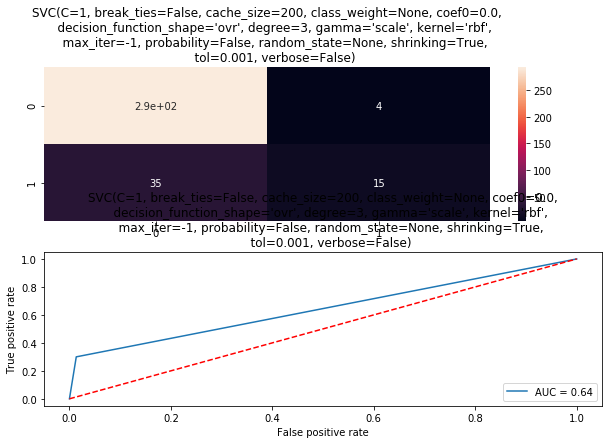

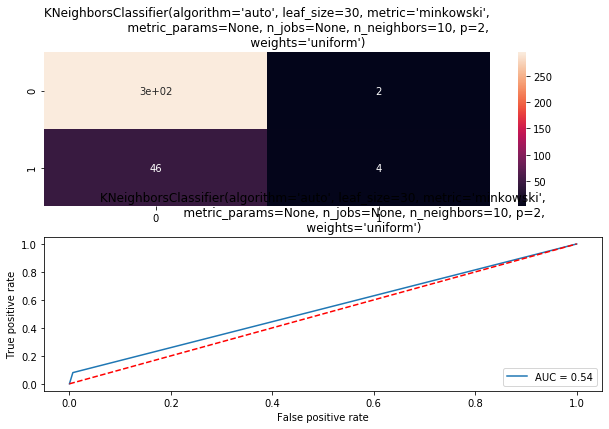

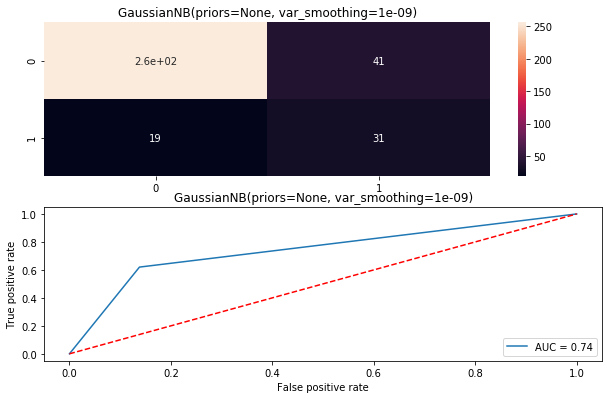

In [97]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),SVC(C=1,kernel='rbf'),KNeighborsClassifier(n_neighbors=10),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [98]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.90,0.79,0.88,0.86,0.83],'Cross_Val_Sore':[0.87,0.78,0.85,0.84,0.82],'Roc_Auc_Score':[0.73,0.61,0.64,0.53,0.74]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.90,0.87,0.73
1,DecisionTreeClassifier,0.79,0.78,0.61
2,SVC,0.88,0.85,0.64
3,KNeighborsClassifier,0.86,0.84,0.53
4,GaussianNB,0.83,0.82,0.74


In [99]:
#Hence it is observed that logistic_regression is giving a good result, therefore finalizing it

In [101]:
lrg=LogisticRegression(penalty='l2')
lrg.fit(x_train,y_train)
prediction=lrg.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(lrg,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.9020172910662824
The Cross Val Score = 0.8680950891460745


In [108]:
from sklearn.externals import joblib
joblib.dump(lrg,"lrg_Analytics.pkl")

['lrg_Analytics.pkl']